# Assignment 3

## Clustering

### 1.1

K-means clustering is an clustering model that works by selecting K number of cluster centers, usually at random. Then assigning each data point to the nearest cluster center. This is typically done using the Euclidean distance, though other distance measures can be used. Then we calculate the mean distance from all the data points to the center and update the center based on the results. The role of K is selecting the number of clusters, where it is important to find a level of clustering that yield relevant results, i.e not too broad or spesific. To find this K, we can use the elbow method, which will indicate graphically, where increasing K results in less growth in accuracy. Stopping criterias for K-means can be either after a set amount of iterations or when the model stops significantly improving.

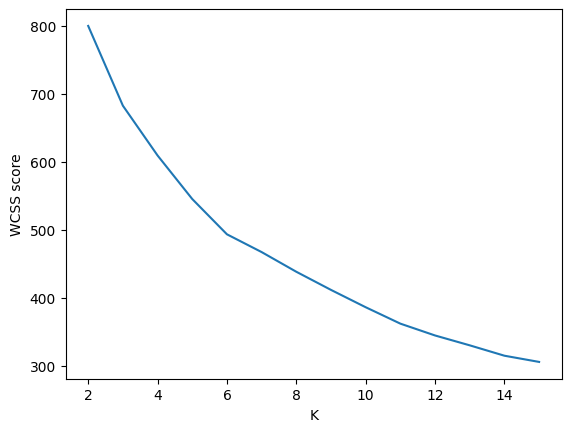

In [2]:
# 1.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('unlabeledData.txt', delimiter=' ')  
scores=[]

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

cluster_centers =[]

for i in range(2,16):

    Kmean = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=300) #setting n_init 10 increases smoothness of curve
    Kmean.fit(data)
    cluster_centers.append(Kmean.cluster_centers_)
    scores.append(Kmean.inertia_)


plt.plot(range(2,16), scores)
plt.xlabel("K")
plt.ylabel("WCSS score")
plt.show()


### 1.3
I believe the best number of K clusters is 6, due to the graph showing a bend or elbow in the curve at K=6

In [15]:
#2.1a and 2.2.a

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Data import and split
data = pd.read_csv('irisBinary.csv')
data['Iris Class'] = data['Iris Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})
X = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].values
y = data['Iris Class'].values.reshape(-1, 1)
X = (X - X.mean(axis=0)) / X.std(axis=0)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=60, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=20, stratify=y_temp, random_state=42)

#Sigmoid activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Parameters
input_neurons = 4
output_neurons = 1
epochs = 200

#Random init weights and bias
np.random.seed(42)
initial_weights = np.random.uniform(size=(input_neurons, output_neurons))
initial_bias = np.random.uniform(size=(1, output_neurons))

#function for reset parameters for testing
def reinitialize_parameters():
    global weights, bias
    weights = np.copy(initial_weights)
    bias = np.copy(initial_bias)

#Forward propagation
def forward_propagation(X):
    output_layer_input = np.dot(X, weights) + bias
    output = sigmoid(output_layer_input)
    return output

#Training function
def train(X_train, y_train, X_val, y_val, epochs, learning_rate):
    
    global weights, bias
    train_loss_history = []
    val_loss_history = []
   

    for epoch in range(epochs):
        output_train = forward_propagation(X_train)
        error_train = y_train - output_train
        delta_train = error_train * sigmoid_derivative(output_train)
        
        weights += np.dot(X_train.T, delta_train) * learning_rate
        bias += np.sum(delta_train, axis=0, keepdims=True) * learning_rate
        
        train_loss = np.mean(np.square(error_train))
        train_loss_history.append(train_loss)
        
        output_val = forward_propagation(X_val)
        
        error_val = y_val - output_val
        
        val_loss = np.mean(np.square(error_val))
        val_loss_history.append(val_loss)
        
    
    return train_loss_history, val_loss_history

#Predict function
def predict(X):
    output = forward_propagation(X)
    return output

learning_rates = [0.01, 0.05, 1]
loss_histories = {}

#Looping through learning rates for testing
for lr in learning_rates:
    reinitialize_parameters()
 
    print(f"Training with learning rate: {lr}")
    train_loss_history, val_loss_history = train(X_train, y_train, X_val, y_val, epochs, lr)
    loss_histories[lr] = train_loss_history #adjust here to switch between train loss and val loss

    predictions = predict(X_test)
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
    accuracy = np.mean(binary_predictions == y_test.flatten()) * 100
    print(f'Accuracy: {accuracy}%')

Training with learning rate: 0.01
Accuracy: 100.0%
Training with learning rate: 0.05
Accuracy: 100.0%
Training with learning rate: 1
Accuracy: 100.0%


200
Minimum loss
0.0021659230451725525


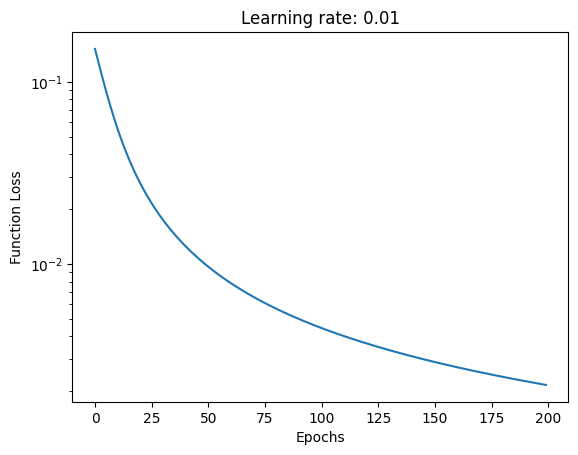

Minimum loss
0.0004577808873527041


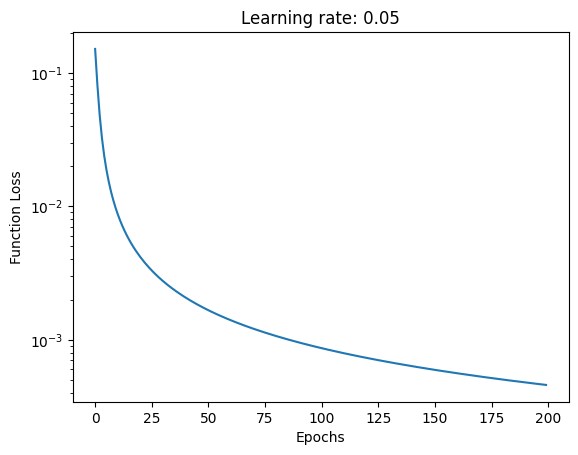

Minimum loss
9.706776996400428e-07


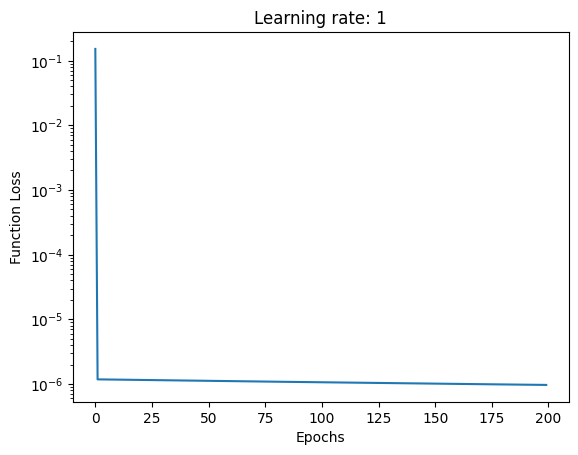

In [16]:
#2.2c

print(len(loss_histories[0.01]))

for loss in loss_histories:

    print("Minimum loss")
    print(loss_histories[loss][-1])


    title = str(loss)
    plt.plot(loss_histories[loss])

    # Adding title and labels
    plt.title('Learning rate: {}'.format(title))
    plt.xlabel('Epochs')
    plt.ylabel('Function Loss')     


    #Attemps to mitigate scientific notation
    #plt.axis([0, epochs,0,loss_histories[loss][0]])
    #plt.ticklabel_format(style='plain', axis='y')

    plt.yscale('log')
    #plt.ticklabel_format(style='plain', axis='y',useOffset=False)
    # Display the graph
    plt.show()

Due to the flattening curve of loss at learning rate 1 i would not deem it neccesary to go beyond 1000 iterations, even 200 iterations should be more than sufficient. The curves are in log scale to mitagate the rapid decrease in loss for learning rate 1.

In [11]:
#Tracking validation loss with learning rate 1 resulted in buggy behaviour so only training loss will be considered

In [5]:
#2.3

best_lr = 0.05
reinitialize_parameters()
train(X_train, y_train, X_val, y_val, epochs, best_lr)
predictions = predict(X_test)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
accuracy = np.mean(binary_predictions == y_test.flatten()) * 100
print(f'Accuracy with learning rate {best_lr}: {accuracy}%')

Accuracy with learning rate 0.05: 100.0%
